In [1]:
import numpy as np
import scipy
import pandas as pd
import pickle

import glob
import cooler

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
files = glob.glob("../DATA/COOL/*.cool")
labels = ['_'.join(x.split('/')[-1].split('_')[0:-3]) for x in files]
resolution = 5000

In [3]:
labels

['nuclear_cycle_13',
 'nuclear_cycle_14_sh_zld',
 'nuclear_cycle_12',
 '3-4h',
 'mitotic_nuclear_cycle_1-14',
 'nuclear_cycle_14_water_injected',
 'nuclear_cycle_14',
 'nuclear_cycle_14_alpha-amanitin_injected',
 'nuclear_cycle_14_triptolide_injected']

In [4]:
datasets = {x:{} for x in labels}

In [5]:
balance = True

for label, file in zip(labels, files):
    c = cooler.Cooler(file)
    for ch in c.chromnames:
        mtx = c.matrix(balance=balance).fetch(ch)
        datasets[label][ch] = mtx.copy()

re.compile('\\s*(?P<INT>[a-zA-z0-9_|]+)|\\s*(?P<ALNUM>[a-zA-z0-9_|]+)|\\s*(?P<COLON>:)|\\s*(?P<HYPHEN>-)')
INT X
re.compile('\\s*(?P<INT>[a-zA-z0-9_|]+)|\\s*(?P<ALNUM>[a-zA-z0-9_|]+)|\\s*(?P<COLON>:)|\\s*(?P<HYPHEN>-)')
INT X
re.compile('\\s*(?P<INT>[a-zA-z0-9_|]+)|\\s*(?P<ALNUM>[a-zA-z0-9_|]+)|\\s*(?P<COLON>:)|\\s*(?P<HYPHEN>-)')
INT 2L
re.compile('\\s*(?P<INT>[a-zA-z0-9_|]+)|\\s*(?P<ALNUM>[a-zA-z0-9_|]+)|\\s*(?P<COLON>:)|\\s*(?P<HYPHEN>-)')
INT 2L
re.compile('\\s*(?P<INT>[a-zA-z0-9_|]+)|\\s*(?P<ALNUM>[a-zA-z0-9_|]+)|\\s*(?P<COLON>:)|\\s*(?P<HYPHEN>-)')
INT 2R
re.compile('\\s*(?P<INT>[a-zA-z0-9_|]+)|\\s*(?P<ALNUM>[a-zA-z0-9_|]+)|\\s*(?P<COLON>:)|\\s*(?P<HYPHEN>-)')
INT 2R
re.compile('\\s*(?P<INT>[a-zA-z0-9_|]+)|\\s*(?P<ALNUM>[a-zA-z0-9_|]+)|\\s*(?P<COLON>:)|\\s*(?P<HYPHEN>-)')
INT 3L
re.compile('\\s*(?P<INT>[a-zA-z0-9_|]+)|\\s*(?P<ALNUM>[a-zA-z0-9_|]+)|\\s*(?P<COLON>:)|\\s*(?P<HYPHEN>-)')
INT 3L
re.compile('\\s*(?P<INT>[a-zA-z0-9_|]+)|\\s*(?P<ALNUM>[a-zA-z0-9_|]+)|\\s*(?P<COLON>:)|\\s

In [80]:
tads_df = pd.read_csv("../DATA/tads_new1.csv", sep=',', quotechar="\"")

In [81]:
tads_df_selected = tads_df.query("cluster==2")

In [82]:
chrms = ['X', '2L', '2R', '3L', '3R']

In [83]:
resolution

5000

In [84]:
colors = ['white', 'blue', 'green', 'black', 'yellow', 'brown', 'purple', 'red']

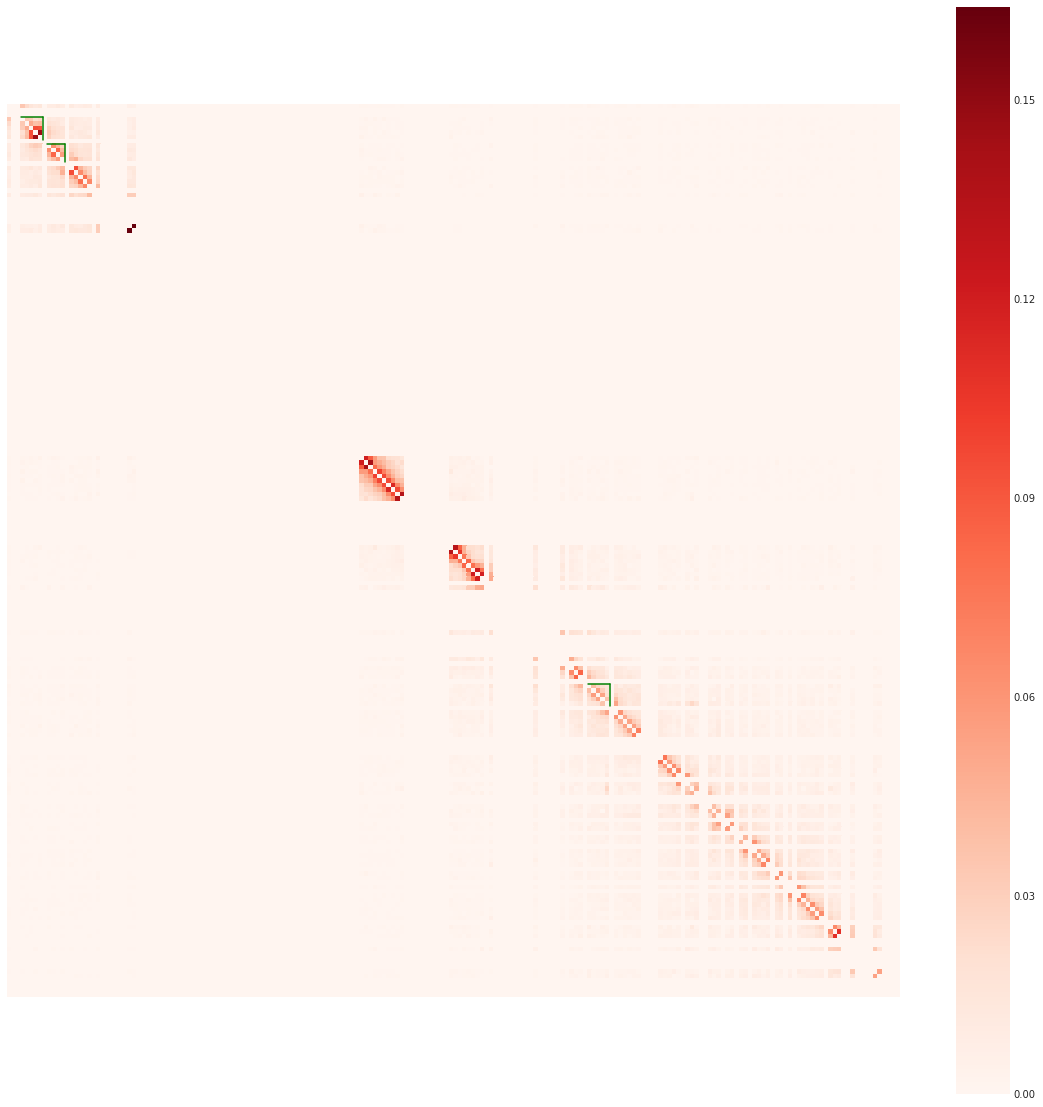

In [108]:
opt_gamma = 125

ch = '2R'
df_tmp = tads_df_selected.query("seqnames=='chr{}'".format(ch))
segments = tads_df.query("seqnames=='chr{}'".format(ch))[['start', 'end']].values/resolution
segments_selected = tads_df_selected.query("seqnames=='chr{}'".format(ch))[['start', 'end']].values/resolution

exp1 = '3-4h'
#exp2 = 'nuclear_cycle_12'

mtx_cor = datasets[exp1][ch] #- datasets[exp2][ch]
np.fill_diagonal(mtx_cor, 0)


bgn = 700
end = bgn+200

plt.figure(figsize=[20,20])
sns.heatmap(mtx_cor[bgn:end, bgn:end], 
            cmap="Reds", #"RdBu_r", 
            square=True, 
            cbar=True)
plt.xticks([])
plt.yticks([])
print('')

for i, seg in zip(tads_df.query("seqnames=='chr{}'".format(ch)).loc[:, 'cluster'], segments):
#for seg in segments:
    if seg[0]<end and seg[1]>bgn:
        #print(i, seg)
        plt.plot([seg[0]-bgn, seg[1]-bgn], [seg[0]-bgn, seg[0]-bgn], color=colors[i])
        plt.plot([seg[1]-bgn, seg[1]-bgn], [seg[0]-bgn, seg[1]-bgn], color=colors[i])
